In [40]:

# Data handling libraries
import pandas as pd          
import numpy as np  

# Model selection & validation tools
from sklearn.model_selection import StratifiedKFold, cross_validate

# Pipeline utility
from sklearn.pipeline import Pipeline

# Text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,      
    precision_score,     
    recall_score,        
    f1_score,            
    make_scorer          
)
# Visualization
import matplotlib.pyplot as plt


In [41]:
#load dataset
df = pd.read_csv("spam_assassin.csv")

df.head()


,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [42]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5796 non-null   object
 1   target  5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


In [44]:
df.columns


Index(['text', 'target'], dtype='object')

In [45]:
df['target'].value_counts()


target
0    3900
1    1896
Name: count, dtype: int64

In [46]:
#clean data :

# Remove rows with missing values
df = df.dropna(subset=['text', 'target'])

# Ensure target is integer 
df['target'] = df['target'].astype(int)

# Define features and labels
X = df['text']
y = df['target']


In [47]:
print(y.unique())
print(y.value_counts())


[0 1]
target
0    3900
1    1896
Name: count, dtype: int64


In [ ]:
#define pipelines :
logreg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        max_df=0.9,
        min_df=5
    )),
    ('model', LogisticRegression(max_iter=1000))
])

rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        max_df=0.9,
        min_df=5
    )),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

In [49]:
#Define Cross-Validation & Metrics :
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}


In [51]:
#5-Fold Cross-Validation :
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logreg_5 = cross_validate(
    logreg_pipeline,
    X,
    y,
    cv=cv5,
    scoring=scoring
)

rf_5 = cross_validate(
    rf_pipeline,
    X,
    y,
    cv=cv5,
    scoring=scoring
)


In [53]:
#10-Fold Cross-Validation :
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

logreg_10 = cross_validate(
    logreg_pipeline,
    X,
    y,
    cv=cv10,
    scoring=scoring
)

rf_10 = cross_validate(
    rf_pipeline,
    X,
    y,
    cv=cv10,
    scoring=scoring
)


In [ ]:
#Results summary :
def summarize_results(results, model_name):
    print(f"\n{model_name}")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize():10s} : Mean = {mean:.4f} | Std = {std:.4f}")


In [55]:
#Display Results :
print("===== 5-FOLD CROSS-VALIDATION =====")
summarize_results(logreg_5, "Logistic Regression")
summarize_results(rf_5, "Random Forest")

print("\n===== 10-FOLD CROSS-VALIDATION =====")
summarize_results(logreg_10, "Logistic Regression")
summarize_results(rf_10, "Random Forest")


===== 5-FOLD CROSS-VALIDATION =====

Logistic Regression
Accuracy   : Mean = 0.9822 | Std = 0.0027
Precision  : Mean = 0.9929 | Std = 0.0048
Recall     : Mean = 0.9525 | Std = 0.0073
F1         : Mean = 0.9723 | Std = 0.0043

Random Forest
Accuracy   : Mean = 0.9898 | Std = 0.0010
Precision  : Mean = 0.9904 | Std = 0.0054
Recall     : Mean = 0.9784 | Std = 0.0039
F1         : Mean = 0.9844 | Std = 0.0015

===== 10-FOLD CROSS-VALIDATION =====

Logistic Regression
Accuracy   : Mean = 0.9829 | Std = 0.0051
Precision  : Mean = 0.9935 | Std = 0.0076
Recall     : Mean = 0.9541 | Std = 0.0137
F1         : Mean = 0.9733 | Std = 0.0081

Random Forest
Accuracy   : Mean = 0.9900 | Std = 0.0050
Precision  : Mean = 0.9905 | Std = 0.0093
Recall     : Mean = 0.9789 | Std = 0.0125
F1         : Mean = 0.9846 | Std = 0.0077


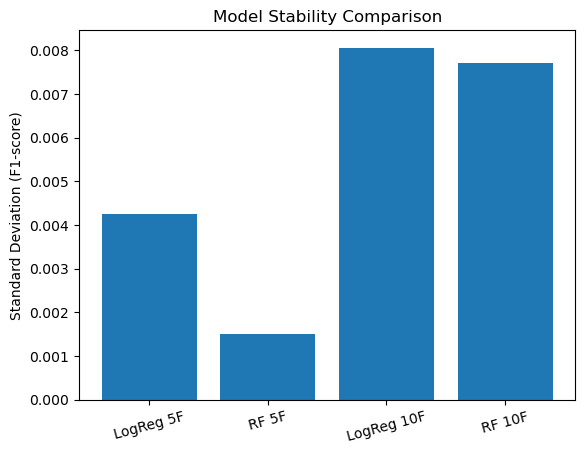

In [56]:
#Model Stability Plot :
models = ['LogReg 5F', 'RF 5F', 'LogReg 10F', 'RF 10F']
f1_std = [
    logreg_5['test_f1'].std(),
    rf_5['test_f1'].std(),
    logreg_10['test_f1'].std(),
    rf_10['test_f1'].std()
]

plt.figure()
plt.bar(models, f1_std)
plt.ylabel("Standard Deviation (F1-score)")
plt.title("Model Stability Comparison")
plt.xticks(rotation=15)
plt.show()
